#**Popular Data Science Topics**
The goal of this project is to find what the most popular data science topics are. There are a few reasons why this information might be useful. Data science is constantly changing & it is important to keep up to date for career purposes. In addition, there are many content creators in Data Science that could benefit from this information as they could get a better idea of what their audience might want to see.

To answer this we will use a very popular platform, Stack Exchange.

###**Stack Exchange**
Stack Exchange consists of 176 question and answer communities including mathematics, physics, philosophy, developers, and  [Data Science](https://datascience.stackexchange.com/). Given that Data Science is a multidisciplinary field we could use various communities:
*   [Data Science](https://datascience.stackexchange.com/)
*   [Cross Validated (Statistics)](https://stats.stackexchange.com/)
*   [Artificial Intelligence](https://ai.stackexchange.com/)
*   [Stack Overflow](https://stackoverflow.com/)

Since Data Science Stack Exchange, DSSE, is a dedicated community with many unanswered questions we will choose to solely focus on this community. Thankfully, they provide a way to query data using [Stack Exchange Data Explorer](https://data.stackexchange.com/datascience/query/new). 


In [93]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

%matplotlib inline


###**Stack Exchange Data Explorer**
There are many columns but we will focus on the ones that seem most relevant for our goal: 

*   Id: An identification number or the post.
*   PostTypeId: An identification number for the type of post.
> 1.   Question
> 2.   Answer
> 3.   Wiki
> 4.   TagWikiExcerpt
> 5.   TagWiki
> 6.   ModeratorNomination
> 7.   WikiPlaceholder
> 8.   PrivelegeWiki
*   CreationDate: The date and time of creation of the post.
*   Score: The post's score.
*   ViewCount: How many times the post was viewed. 
*   Tags: What tags were used. 
*   AnswerCount: How many answers the question got (only applicable to question posts).
*   FavoriteCount: How many times the question was favored (only applicable to question posts).


## **Querying the Data**

To get the data we will use following Query:

**SELECT Id, PostTypeId, CreationDate**

> **Score, ViewCount, Tags**

> **AnswerCount, FavoriteCount**

**FROM posts**

**WHERE YEAR(CreationDate) = 2019;**

The resulting query can be downloaded to a csv or downloaded directly using this [link](https://data.stackexchange.com/datascience/csv/1689747).

## **Reading in the Data & Data Exploration**

In [94]:
questions = pd.read_csv('https://data.stackexchange.com/datascience/csv/1689747', parse_dates=['CreationDate'])

In [95]:
questions.head(15)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,48242,2019-03-30 01:32:37,1,122,<keras>,1,NaN
1,48246,2019-03-30 06:11:20,4,7233,<machine-learning><tensorflow><accuracy><metri...,4,1.0
2,48250,2019-03-30 08:25:31,0,6836,<pandas>,1,NaN
3,48253,2019-03-30 09:39:19,0,721,<keras><tensorflow>,1,NaN
4,48255,2019-03-30 10:05:14,1,372,<machine-learning><optimization><gradient-desc...,1,NaN
5,48257,2019-03-30 11:59:39,2,68,<machine-learning><pac-learning>,1,NaN
6,48262,2019-03-30 15:46:21,2,1495,<python><tensorflow><cnn><image-preprocessing>,1,NaN
7,48263,2019-03-30 15:47:51,1,91,<machine-learning><neural-network><gradient-de...,1,NaN
8,48264,2019-03-30 16:04:38,2,62,<classification><self-study>,1,NaN
9,48269,2019-03-30 17:19:33,4,868,<machine-learning><random-forest><decision-trees>,1,2.0


In [96]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6777 non-null   int64         
 1   CreationDate   6777 non-null   datetime64[ns]
 2   Score          6777 non-null   int64         
 3   ViewCount      6777 non-null   int64         
 4   Tags           6777 non-null   object        
 5   AnswerCount    6777 non-null   int64         
 6   FavoriteCount  1597 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 370.7+ KB


In [97]:
questions.isnull().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    5180
dtype: int64

There are a few problems with the data: 


1.   In some cases there are multiple tags -- we will need to extract using string manipulation.
2.   'FavoriteCount' has 5191 missing value and needs to be changed to an integer.

## **Data Cleaning**
First, 'FavoriteCount'has missing values that likely did not get any favorites so we will fill this with 0.

In [98]:
#Filling in missing values for favorite count with 0 and change to integer
questions['FavoriteCount'] = questions['FavoriteCount'].fillna(0).astype(int)

Next, seperate the values in 'Tags' with multiple tags. 

In [99]:
questions['Tags'] = questions['Tags'].str.replace('><', ', ').str.replace('<','').str.replace('>','').str.replace(' ','')

In [100]:
questions['Tags'] = questions['Tags'].str.split(',')
questions

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,48242,2019-03-30 01:32:37,1,122,[keras],1,0
1,48246,2019-03-30 06:11:20,4,7233,"[machine-learning, tensorflow, accuracy, metri...",4,1
2,48250,2019-03-30 08:25:31,0,6836,[pandas],1,0
3,48253,2019-03-30 09:39:19,0,721,"[keras, tensorflow]",1,0
4,48255,2019-03-30 10:05:14,1,372,"[machine-learning, optimization, gradient-desc...",1,0
...,...,...,...,...,...,...,...
6772,57819,2019-08-19 17:53:22,3,50,"[machine-learning, lstm, bert]",0,0
6773,57821,2019-08-19 19:16:49,4,147,"[neural-network, keras, tensorflow]",2,1
6774,57832,2019-08-20 04:04:07,1,32,"[reinforcement-learning, dqn, image, image-size]",1,0
6775,57834,2019-08-20 05:20:10,1,28,"[classification, random-forest, logistic-regre...",1,1


## **Most Used and Most Viewed Tags**
Now that we have seperated the Tags, we can find what tags are most uses and most viewed. We will find the top 20 for each, for now. 




In [101]:
#Creating a frequency table for tags used
tags_frequency_table = {}

for tags in questions['Tags']:
  for tag in tags: 
    if tag in tags_frequency_table:
      tags_frequency_table[tag] += 1
    else: 
      tags_frequency_table[tag] = 1

In [102]:
#Creating a DataFrame of the tags_frequency_table
tag_count = pd.DataFrame.from_dict(tags_frequency_table, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)

In [103]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
data-mining,173
feature-selection,175
r,193
predictive-modeling,213
clustering,229
dataset,250
regression,270
lstm,290
pandas,315
time-series,337


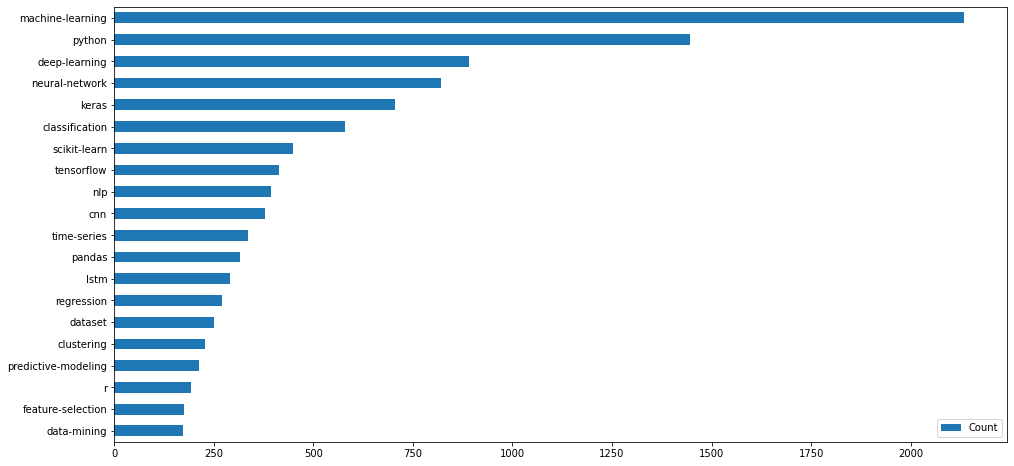

In [104]:
most_used.plot(kind="barh", figsize=(16,8))

In [105]:
tag_view_count_freq = {} 

for index, row in questions.iterrows():
  for tag in row['Tags']:
    if tag in tag_view_count_freq: 
      tag_view_count_freq[tag] += row['ViewCount']
    else: 
      tag_view_count_freq[tag] = row['ViewCount']

view_count = pd.DataFrame.from_dict(tag_view_count_freq, orient="index")
view_count.rename(columns={0: "ViewCount"}, inplace=True)
most_viewed = view_count.sort_values(by = 'ViewCount').tail(20)
most_viewed

,ViewCount
xgboost,124645
dataset,130517
csv,141548
pytorch,146022
regression,152675
numpy,189916
time-series,208555
lstm,225047
nlp,257931
cnn,270445


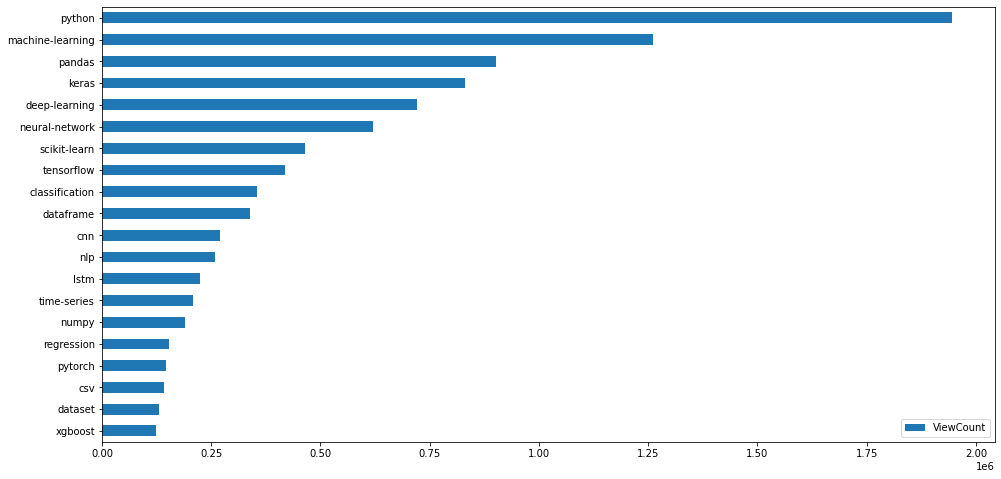

In [71]:
most_viewed.plot(kind="barh", figsize=(16,8))

Now, side-by-side.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cb515e7d0>],
      dtype=object)

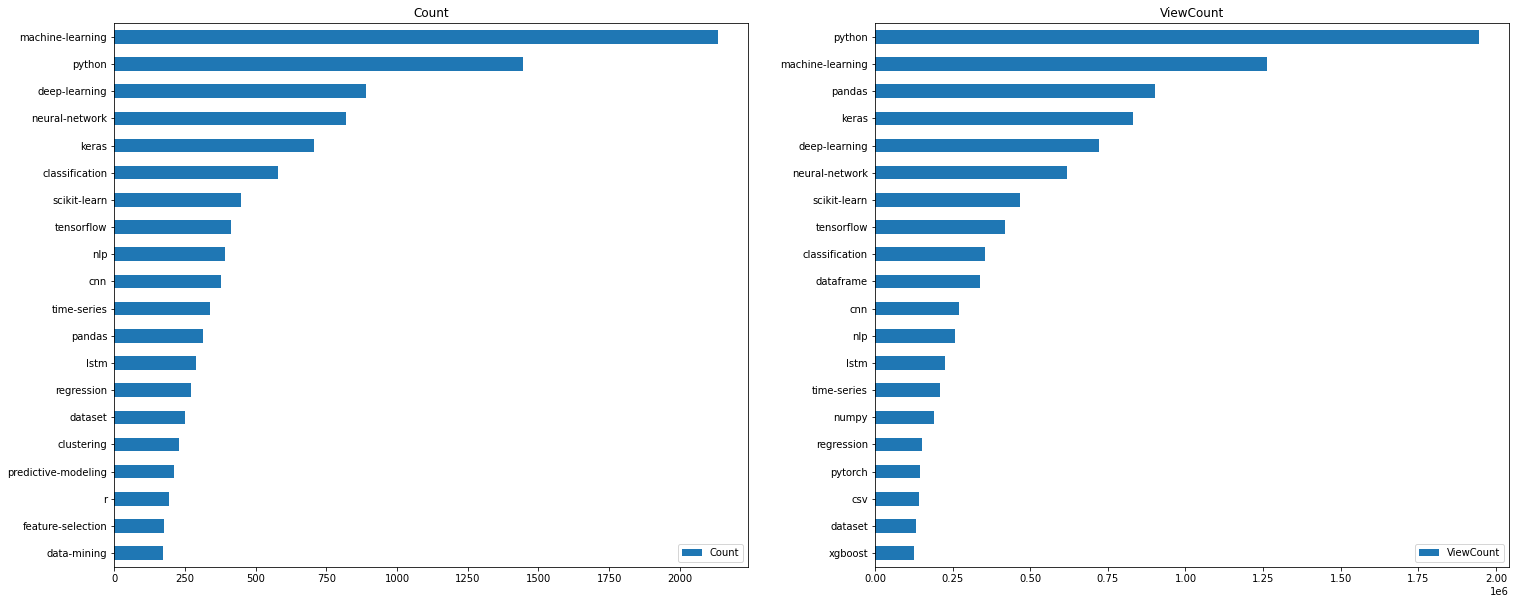

In [72]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches((25,10))
most_used.plot(kind="barh", ax = axes[0], subplots = True)
most_viewed.plot(kind = 'barh', ax = axes[1], subplots = True)

## **Relations Between Tags** 

Some tags are very broad and will not be very useful (python, dataset, r). In addition, some tags stand out as being related. For example, pandas and python are related since pandas is a Python library. Finding related tags can be extremely beneficial so we can find the larger topics that are most important to the data science community.

We will investigate how tags are related.


In [73]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(questions['Tags']).transform(questions['Tags'])
df = pd.DataFrame(te_ary, columns = te.columns_)
df

,.net,3d-reconstruction,ab-test,accuracy,activation-function,active-learning,activity-recognition,actor-critic,adaboost,aggregation,ai,alex-net,algorithms,allennlp,anaconda,ann,annotation,anomaly,anomaly-detection,anonymization,anova,apache-hadoop,apache-spark,arima,association-rules,attention-mechanism,auc,audio-recognition,autoencoder,automatic-summarization,automation,automl,aws,aws-lambda,azure-ml,backpropagation,batch-normalization,bayes-error,bayesian,bayesian-networks,...,text-classification,text-filter,text-generation,text-mining,tfidf,theano,theory,time,time-series,tokenization,tools,topic-model,torch,training,transfer-learning,transformer,truncation-decision-trees,tsne,twitter,unsupervised-learning,usecase,vae,variance,vc-theory,vector-space-models,version-control,vgg16,visualization,web-scraping,weight-initialization,weighted-data,weka,wikipedia,windows,wolfram-language,word,word-embeddings,word2vec,xgboost,yolo
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,Fal

Support is a popular metric used in association rules to find frequently used and paired tags.

Support = FREQ(a,b)/N

In [74]:
from mlxtend.frequent_patterns import apriori
frequent_tagsets = apriori(df,min_support= 0.025, use_colnames = True)
frequent_tagsets.sort_values(by = 'support', ascending= False)

,support,itemsets
9,0.315036,(machine-learning)
15,0.213516,(python)
5,0.131327,(deep-learning)
11,0.120997,(neural-network)
7,0.104176,(keras)
0,0.085436,(classification)
18,0.066106,(scikit-learn)
20,0.060941,(tensorflow)
30,0.059761,"(python, machine-learning)"
12,0.057990,(nlp)


In [75]:
# from mlxtend.frequent_patterns import association_rules
# res = association_rules(frequent_tagsets, metric = 'confidence', min_threshold = 0.02)
# res

###**Domain Knowledge**

With sufficient domain knowledge we see that most of the top tags have one central theme: deep learning. Deep learning is one of the most disruptive technologies in today's day and seems to continue to expand everyday. Let's explore Deep Learning posts. In order to do this we will have to use our domain knowledge to identify tags that constitue as Deep Learning. 

The tags that we will use to constitute as Deep Learning are ['deep-learning', 'neural-network', 'keras', 'scikit-learn', 'tenserflow', 'nlp', 'cnn', 'lstm'].

###**Deep Learning Over Time**

We are interested in seeing the evolution of Deep Learning posts over time. Since data science technology isn't measured on a specific time scale, we will measure deep learning posts on a quarterly basis. 

To explore this we will need to query all the questions ever posted on Stack Exchange DSSE using the following query:  

**SELECT Id, CreationDate, Tags**

**FROM posts**

**WHERE PostTypeId = 1;**


In [106]:
all_questions = pd.read_csv('https://data.stackexchange.com/datascience/csv/1694027', parse_dates=['CreationDate'])

In [107]:
all_questions['Tags'] = all_questions['Tags'].str.replace('><', ', ').str.replace('<','').str.replace('>','').str.replace(' ','')
all_questions['Tags'] = all_questions['Tags'].str.split(',')


In [108]:
def deep_learning(tags):
  for tag in tags: 
    if tag in ['deep-learning', 'neural-network', 'keras', 'scikit-learn', 'tenserflow', 'nlp', 'cnn', 'lstm']:
      return 1 
  return 0
all_questions['DeepLearning'] = all_questions['Tags'].apply(deep_learning)

In [109]:
all_questions

,Id,CreationDate,Tags,DeepLearning
0,48242,2019-03-30 01:32:37,[keras],1
1,48246,2019-03-30 06:11:20,"[machine-learning, tensorflow, accuracy, metri...",0
2,48250,2019-03-30 08:25:31,[pandas],0
3,48253,2019-03-30 09:39:19,"[keras, tensorflow]",1
4,48255,2019-03-30 10:05:14,"[machine-learning, optimization, gradient-desc...",0
...,...,...,...,...
27532,27805,2018-02-14 15:28:55,"[data-mining, dataset, visualization, pandas, ...",0
27533,27806,2018-02-14 15:34:30,"[deep-learning, neural-network, cnn, computer-...",1
27534,27807,2018-02-14 15:35:44,"[machine-learning, neural-network, classificat...",1
27535,27819,2018-02-14 23:13:00,"[pandas, data-wrangling]",0


Now, we can track Deep Learning quarterly. Since the first quarter of 2021 is not over yet we will get rid of those dates:

In [114]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2021]

def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [115]:
all_questions.head(10)

,Id,CreationDate,Tags,DeepLearning,Quarter
0,48242,2019-03-30 01:32:37,[keras],1,19Q1
1,48246,2019-03-30 06:11:20,"[machine-learning, tensorflow, accuracy, metri...",0,19Q1
2,48250,2019-03-30 08:25:31,[pandas],0,19Q1
3,48253,2019-03-30 09:39:19,"[keras, tensorflow]",1,19Q1
4,48255,2019-03-30 10:05:14,"[machine-learning, optimization, gradient-desc...",0,19Q1
5,48257,2019-03-30 11:59:39,"[machine-learning, pac-learning]",0,19Q1
6,48262,2019-03-30 15:46:21,"[python, tensorflow, cnn, image-preprocessing]",1,19Q1
7,48263,2019-03-30 15:47:51,"[machine-learning, neural-network, gradient-de...",1,19Q1
8,48264,2019-03-30 16:04:38,"[classification, self-study]",0,19Q1
9,48269,2019-03-30 17:19:33,"[machine-learning, random-forest, decision-trees]",0,19Q1


Now, we will group by quarter and 1) count the number of deep learning questions 2) Count the total number of questions 3) Compute the ratio of 1 & 2

In [116]:
quarterly = all_questions.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
18,18Q4,543,1268,0.428233
6,15Q4,75,380,0.197368
22,19Q4,647,1506,0.429615
13,17Q3,260,707,0.367751
26,20Q4,692,1543,0.448477


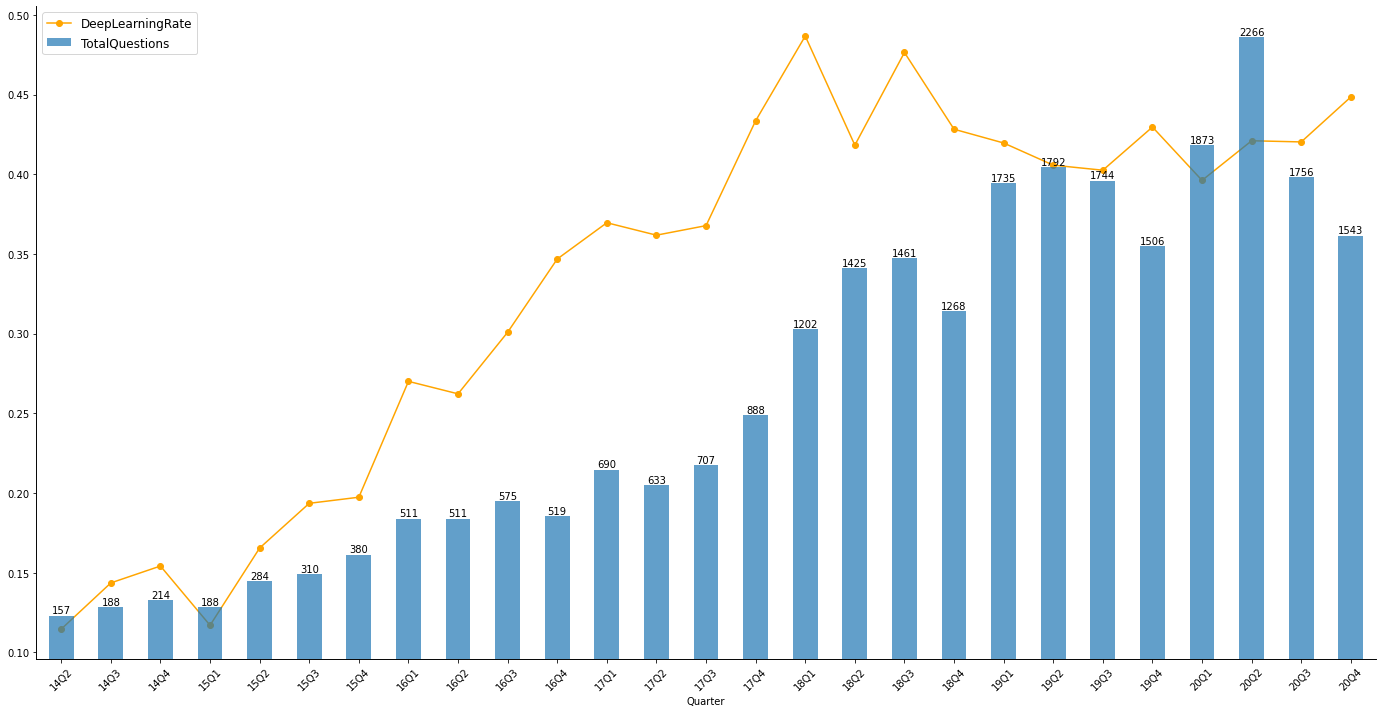

In [113]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

Deep Learning grew at an incredible rate since the start of DDSE and peaked the last quarter of 2017.Although it does seem like deep learning questions are plateauing, it does not seem like they are decreasing. 

## **Conclusion**

Our analysis concluded that Deep Learning is the most popular topic right now. Python seems to be the most popular programming language. 

Moving forward there are a few things we should consider: 


*   What are the fastest growing topics (in general, within Deep Learning)
*   Could we include other features in our analysis like scores and favoitecounts.
*   How could we use other communities in Stack Exchange or other sites to help determine most popular topics. 
